In [21]:
import kagglehub
path = kagglehub.dataset_download("dipkhan/fake-news-detection-dataset")

Using Colab cache for faster access to the 'fake-news-detection-dataset' dataset.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

In [23]:
import pandas as pd

# List the contents of the downloaded path to identify the dataset file
print(os.listdir(path))

['fake_news_merged.csv']


In [24]:
csv_file_path = os.path.join(path, 'fake_news_merged.csv')
df = pd.read_csv(csv_file_path)
print(f"Dataset loaded successfully. Shape: {df.shape}")
df.head()

Dataset loaded successfully. Shape: (40587, 4)


,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [25]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40587 entries, 0 to 40586
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40587 non-null  int64 
 1   title       40587 non-null  object
 2   text        40587 non-null  object
 3   label       40587 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [26]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
          Unnamed: 0     title  \
count   40587.000000     40587   
unique           NaN     39997   
top              NaN  no title   
freq             NaN       153   
mean     8928.960012       NaN   
std      6904.191649       NaN   
min         0.000000       NaN   
25%      3382.000000       NaN   
50%      6764.000000       NaN   
75%     14205.500000       NaN   
max     24352.000000       NaN   

                                                     text         label  
count                                               40587  40587.000000  
unique                                              40585           NaN  
top     Here s the original post by the Washington Pos...           NaN  
freq                                                    2           NaN  
mean                                                  NaN      0.540173  
std                                                   NaN      0.498390  
min                                             

In [27]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [28]:
print("\nDistribution of 'label' column:")
print(df['label'].value_counts())


Distribution of 'label' column:
label
1    21924
0    18663
Name: count, dtype: int64


In [29]:
print("\nDataFrame Columns:")
print(df.columns.tolist())


DataFrame Columns:
['Unnamed: 0', 'title', 'text', 'label']


In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab/english/')
except LookupError:
    nltk.download('punkt_tab')

df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[\d\W_]+', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

print(df[['title', 'text', 'combined_text', 'preprocessed_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                               title  \
0  Palestinians switch off Christmas lights in Be...   
1  China says Trump call with Taiwan president wo...   
2   FAIL! The Trump Organization’s Credit Score W...   
3  Zimbabwe military chief's China trip was norma...   
4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  \
0  RAMALLAH, West Bank (Reuters) - Palestinians s...   
1  BEIJING (Reuters) - U.S. President-elect Donal...   
2  While the controversy over Trump s personal ta...   
3  BEIJING (Reuters) - A trip to Beijing last wee...   
4  There has never been a more UNCOURAGEOUS perso...   

                                       combined_text  \
0  Palestinians switch off Christmas lights in Be...   
1  China says Trump call with Taiwan president wo...   
2   FAIL! The Trump Organization’s Credit Score W...   
3  Zimbabwe military chief's China trip was norma...   
4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receiv

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

y = df['label']


print(f"Shape of TF-IDF features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

Shape of TF-IDF features (X): (40587, 5000)
Shape of labels (y): (40587,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully.")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Shape of X_train: (32469, 5000)
Shape of X_test: (8118, 5000)
Shape of y_train: (32469,)
Shape of y_test: (8118,)
Model trained successfully.

Accuracy: 0.9712
Precision: 0.9750
Recall: 0.9719
F1-Score: 0.9735

Confusion Matrix:
[[3588  110]
 [ 124 4296]]


In [15]:
fake_text = " ".join(df[df['label'] == 0]['preprocessed_text'])
real_text = " ".join(df[df['label'] == 1]['preprocessed_text'])


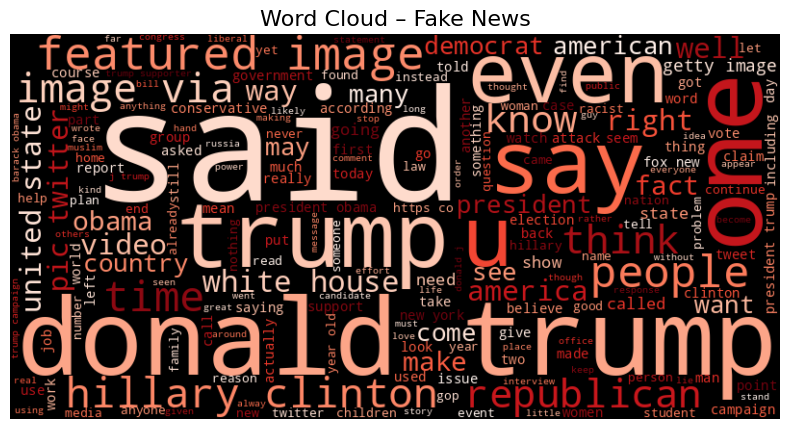

In [16]:
fake_wc = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds',
    max_words=200
).generate(fake_text)

plt.figure(figsize=(10,5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud – Fake News", fontsize=16)
plt.show()


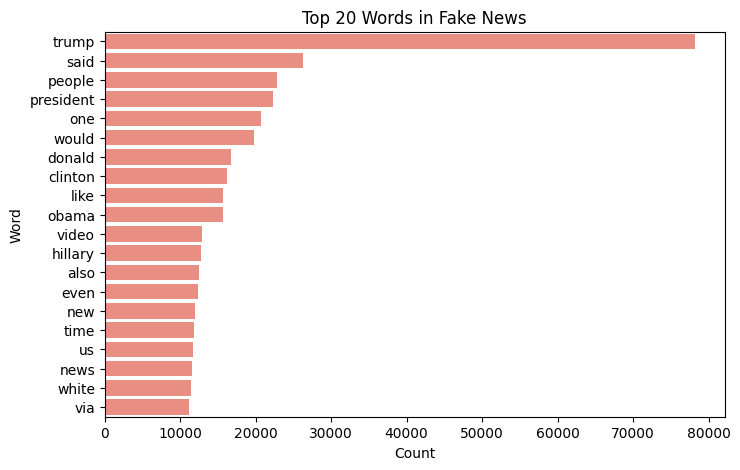

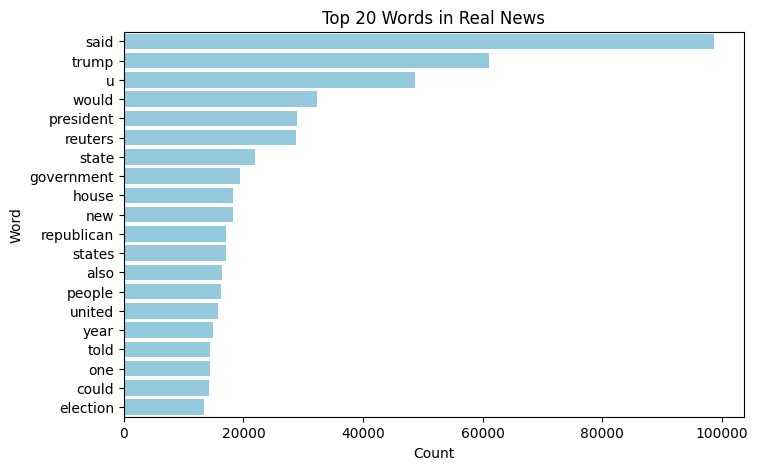

In [17]:
from collections import Counter

def plot_top_words(text, title, color):
    words = text.split()
    common_words = Counter(words).most_common(20)
    df_words = pd.DataFrame(common_words, columns=['Word','Count'])

    plt.figure(figsize=(8,5))
    sns.barplot(x='Count', y='Word', data=df_words, color=color)
    plt.title(title)
    plt.show()

plot_top_words(fake_text, "Top 20 Words in Fake News", "salmon")
plot_top_words(real_text, "Top 20 Words in Real News", "skyblue")


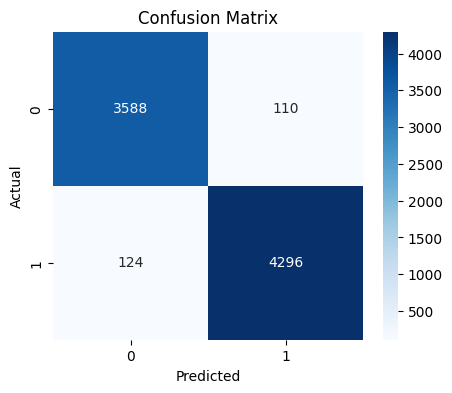

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
def predict_sentiment(news_text):
    vector = tfidf_vectorizer.transform([news_text])
    prediction = model.predict(vector)

    if prediction[0] == 1:
        return "Positive News"
    else:
        return "Negative News"


In [20]:
sample_news = "This government policy will help the economy grow"
print(predict_sentiment(sample_news))


Negative News
